

# Project: TMDb Movies project UDACITY
### By Ifalore Simeon

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

SOURCE TO DATASET https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv.


 
>### Questions:
>1. Top 5 most expensive movies
>2. What is the average runtime, budget, revenue of the movies
>3. What is the movie with the highest andlowest profit
>4. Which year had most profitable movies
>5.The most popular movie before the movie with the highest profit was released
>6.Is there a correlation between how popular a movie is and the profit?
 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
> The data wrangling process will be done using pandas. Some methods will be used to explore the dataset and draw intuition about the dataset to understand the shape, datatype and other parameters**
First o all I will load my data and use several codes to draw insight as to the shape, datatypes, NAN values etc present in the data

In [2]:

df = pd.read_csv('tmdb-movies.csv')
# looking at null values and datatypes so I can know what cleanin techniques I will use
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [3]:
#Exploring the shape of the dataset
df.shape

(10866, 21)

### observations
> - The data set has "10866" rows and "21" columns 
> - There are some null values in the data set
> - data type looks consistent but release_date is stored as a string 
> - budget and revenue are floats
> - there are some 0 values in our data sets

In [4]:
# Confirming that release_date is stored as a string
type(df['release_date'][0])

str

In [5]:
# exploring the frist 5 rows to have a sense of my data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
# checking for duplicates in the data
sum(df.duplicated())

1

In [7]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


<a id='cleaning'></a>
### Data Cleaning - 
Thes list below showsthe different cleaning techniques that will be employed to make the dataset appropriate for Exploratory data Analysis

<ul>
  <li><b></b>  Changing release date column from string to datetime data type. </li>

  <li><b></b>Removing the duplicated values.</li>

  <li><b></b>Changing format of budget and revenue columns.</li>

 <li><b></b>Remove unnecessary columns such as  'imdb_id', 'budget_adj', 'revenue_adj', 'homepage',  production_company, 'keywords', 'overview', 'production_companies', 'vote_count'  and 'vote_average'.</li> 

  <li><b></b>replace all the values from '0' to NAN in 'budget' and  'revenue' columns, then removing them.</li>
</ul>

### Changing release date column from string to date type data.

To change the release_date to datetime I will have to use the datetime function of pandas 

In [8]:
df['release_date'] = pd.to_datetime(df['release_date'])
# checking to see that the datatypes has changed to timestamp for 'release_date'
type(df['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

Now I need to confirm that my release_date is now a date datatype

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

### Removing duplicate data

Before proceeding withthe analysis some duplicate values need to be dropped so they don't affect the outcome of the analysis

In [10]:
# removing duplicate data 
df.drop_duplicates(keep ='first', inplace=True)
# checking for duplicated value
df.duplicated().sum()

0

In [11]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### Changing format of budget and revenue columns.

In [12]:
change_type=['budget', 'revenue']

#changing data type
df[change_type]=df[change_type].applymap(np.int64)

#printing data types of the dataset to see the changed information
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

### Removing unnecessary columns

Since I won't be using all columns in my analysis, I will be dropping the columns that I won't be needing at all throught the course of the EDA because they are not relevant to answering the posed questions 

In [13]:
#list of columns I want to remove
col_to_del = ['imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']
#deleting the columns from the database
df = df.drop(col_to_del, 1)

# previewing the new dataset
df.head(3)

C:\Users\Simeon\AppData\Local\Temp\ipykernel_2248\2768113811.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(col_to_del, 1)


,id,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


### Replacing the '0' in our column to NAN so we can drop it
After exploring the first and last few rows in budget and revenue columns, there are several entries have '0' value, so firstly I will convert those values to NAN then I will remove them from the dataset.

In [14]:

# creating a list of revenue and budget columns
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
df[temp_list] = df[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
df.dropna(subset = temp_list, inplace = True)

After removing them we ned to check to see the that the amount of columns have reduced to be sure the affected columns have 
beendropped

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3854 non-null   int64         
 1   popularity      3854 non-null   float64       
 2   budget          3854 non-null   float64       
 3   revenue         3854 non-null   float64       
 4   original_title  3854 non-null   object        
 5   cast            3850 non-null   object        
 6   director        3853 non-null   object        
 7   tagline         3574 non-null   object        
 8   runtime         3854 non-null   int64         
 9   genres          3854 non-null   object        
 10  release_date    3854 non-null   datetime64[ns]
 11  release_year    3854 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 391.4+ KB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Top 5 most expensive movies)

To get the top 5 most expensive movies we need to sort the dataset based on budget in descending order. This will give us the list from most expensive to the least expensive 

In [16]:

expensive_movies = df.sort_values(by='budget',ascending=False).head()
expensive_movies

,id,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
2244,46528,0.250540,425000000.0,1.108757e+07,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Assassin. Hero. Legend.,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,2010
3375,1865,4.955130,380000000.0,1.021683e+09,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,Live Forever Or Die Trying.,136,Adventure|Action|Fantasy,2011-05-11,2011
7387,285,4.965391,300000000.0,9.610000e+08,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,"At the end of the world, the adventure begins.",169,Adventure|Fantasy|Action,2007-05-19,2007
14,99861,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,A New Age Has Come.,141,Action|Adventure|Science Fiction,2015-04-22,2015
6570,1452,1.957331,270000000.0,3.910812e+08,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,NaN,154,Adventure|Fantasy|Action|Science Fiction,2006-06-28,2006


In [17]:
least_expensive  = df.sort_values(by='budget')
least_expensive.head()

,id,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
3581,59296,0.520430,1.0,1378.0,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,Here comes the ride.,90,Comedy|Romance,2011-06-03,2011
2618,39964,0.090186,1.0,100.0,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,A comedy about a guy who would do anything to ...,95,Comedy|Romance,1999-04-23,1999
8944,14373,0.464188,2.0,16.0,Death Wish 2,Charles Bronson|Jill Ireland|Vincent Gardenia|...,Michael Winner,First His Wife. Now His Daughter. It's Time To...,88,Action|Crime|Thriller,1982-02-20,1982
10050,20701,0.317091,3.0,16.0,Tales from the Darkside: The Movie,Rae Dawn Chong|Christian Slater|Deborah Harry|...,John Harrison,From the depths of four twisted minds.,93,Fantasy|Horror|Comedy,1990-05-03,1990
2398,39356,0.028456,3.0,43.0,Boy,James Rolleston|Craig Hall|Taika Waititi|Te Ah...,Taika Waititi,"Summer, Girls, Gangs, Drugs ... its not easy b...",87,Drama|Comedy,2010-02-14,2010


Movie ID 2244 The Warrior's Way shows the largest budget  i.e 425000000

Whereas Love, Wedding, Marriage with id no. 3581 shows the smallest budget i.e 1 dollar

### Research Question 2  (What is the average runtime, budget, revenue of the movies)

To avoid repetition I am going to create a simple function called avg i.e average to calculate the average runtime,budget and revenue. This will give us an idea of where majority of the movies fall in terms of budget, revenue and runtime. 

In [18]:
# defining a function to find average of a column
def avg(column):
    return df[column].mean()

In [19]:
# calculating the average runtime
avg(['runtime'])

runtime    109.220291
dtype: float64

No unit was given for runtime, budget and revenue so we would assume runtime is in minutes, revenue and budget are in dollars 

In [20]:
# calculating the average budget. in this case a print function was added to help visualize the rounded value
print(round(avg(['budget'])));

budget    37203697.0
dtype: float64


In [21]:
# calculating the average revenue
print(round(avg(['revenue'])));

revenue    107686616.0
dtype: float64


On the average the runtime, budget and revenue are 109.2 mins,  37203697 dollars,  107686616 dollars

### Research Question 3 (What is the movie with the highest and lowest profit)

We don't have a column represents the total profits of the movies in our dataset to find the most and least profit movies so I will answer this question in two steps:

#### A. Calculating the profit of each movie
I'm going to add a new column to the dataset represents the total profit every movie in our dataset made by subtracting the revenue from the budget.

In [22]:
# Finding profit
df['profit'] = df['revenue']-df['budget']

#### B. From the profit column calculate movies with most and least profit¶

In [23]:

# Which movie has highest profit?
highest_profit_movie = df.sort_values(by='profit',ascending=False)
highest_profit_movie.iloc[0]

id                                                            19995
popularity                                                 9.432768
budget                                                  237000000.0
revenue                                                2781505847.0
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                              James Cameron
tagline                                 Enter the World of Pandora.
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
release_year                                                   2009
profit                                                 2544505847.0
Name: 1386, dtype: object

In [24]:
lowest_profit_movie = df.sort_values(by='profit')
lowest_profit_movie.iloc[0]

id                                                            46528
popularity                                                  0.25054
budget                                                  425000000.0
revenue                                                  11087569.0
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
tagline                                     Assassin. Hero. Legend.
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
release_year                                                   2010
profit                                                 -413912431.0
Name: 2244, dtype: object

>Movie Avatar with id 19995 shows the highest earned profit i.e 237000000.

> WhereasThe Warrior's Way  movie with id 46528 shows the lowest earned profit i.e -413912431

### Research Question 4 (Which year had most profitable movies)

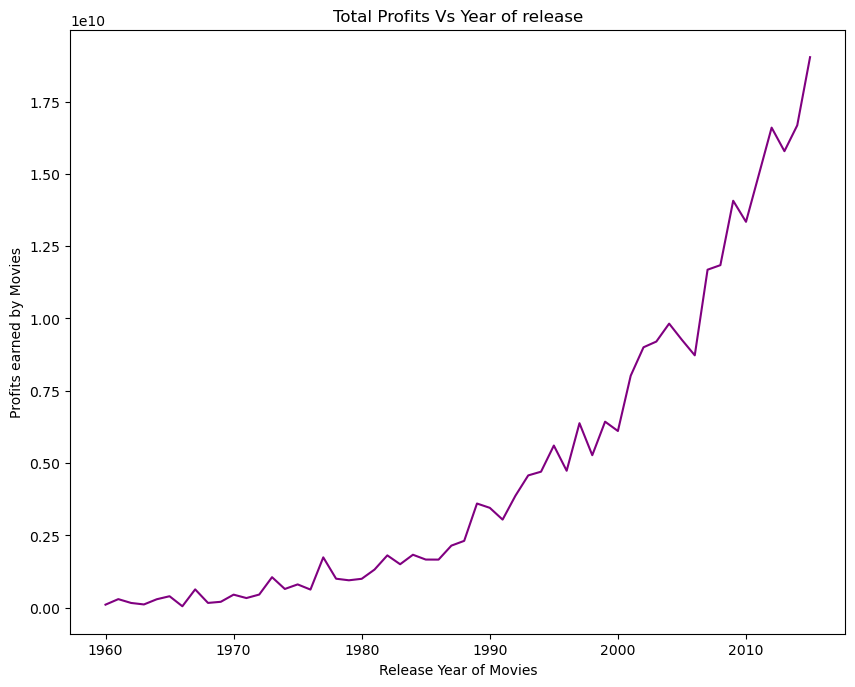

In [25]:
#We will be using Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year

profits_year = df.groupby('release_year')['profit'].sum()

#figure size(width, height) 
plt.figure(figsize=(10,8), dpi = 100)

#labelling x-axis
plt.xlabel('Release Year of Movies')
#labelling  y-axis
plt.ylabel('Profits earned by Movies')
#title of the plot
plt.title('Total Profits Vs Year of release')

#plotting the graph
plt.plot(profits_year, color = 'purple')
plt.show()

In [26]:
#To find which year made the highest profit?
profits_year.idxmax()

2015

Graphically we cannot easily spot that 2015 is the year with the highest profit but using the idxmax() helps confirm that . 
However an important observation from the graph is that we can see an upwards trend of profit Year on Year

### Research Question 5 (The most popular movie before the movie with the highest profit was released)

Avatar was the movies with the highst profit in 2009 but before then what movie was the most popular?  

In [27]:
# in this case the highest profit earning movie was Avatar released in 2009
popular_movie_2010_idx = df[df["release_year"]<=2009]["popularity"].idxmax()
df.loc[popular_movie_2010_idx]

id                                                               11
popularity                                                12.037933
budget                                                   11000000.0
revenue                                                 775398007.0
original_title                                            Star Wars
cast              Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
director                                               George Lucas
tagline                A long time ago in a galaxy far, far away...
runtime                                                         121
genres                             Adventure|Action|Science Fiction
release_date                                    1977-03-20 00:00:00
release_year                                                   1977
profit                                                  764398007.0
Name: 1329, dtype: object

The most popular movie was Star Wars released in 1977 before Avatar 


### Research Question 5 (Is there a correlation between popularity and profit?)

We have looked at Avatar and Star Wars in previos sections but does the popularity of a movie affect how 
much profit is earned from it? 

Firstly, I will create a scatter plot between popularity and profit to visually see the corelation and then use the corr()
to get the exact value 

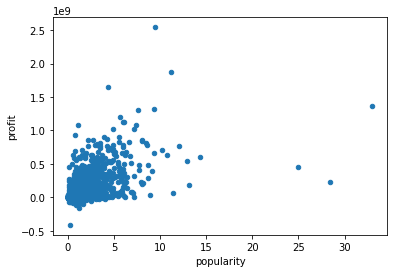

In [28]:
# creating a scatterplot between popularity and profit
df.plot(x = 'popularity', y = 'profit', kind = 'scatter');

In [29]:
# getiing the quantitative value for the correlation between profit and popularity 
corr = df['popularity'].corr(df['profit'])
corr

0.5962013674920571

<a id='conclusions'></a>
## Conclusions
To summarize the whole analysis:
<ul>
  <li><b></b> 

**SUMMARY**

The top 5 most expensive movies are:
   <li><b></b> The Warrior's Way </li>
   <li><b></b> Pirates of the Caribbean: On Stranger Tides 
   <li><b></b> Pirates of the Caribbean: At World's End
   <li><b></b> Avengers: Age of Ultron
   <li><b></b> Superman Returns
    
> The average:
  <li><b></b>  runtime is 109.220291
   <li><b></b> budget is 37203697.0
   <li><b></b> revenue is 107686616.0
    
<li><b></b> Movie with the highest profit is 'Avatar', While Movie with the lowest profit is 'The Warrior's Way'
<li><b></b> The year with the most profit is 2015 While there is a 0.59 correllation between popularity and profit

**CONCLUSION**

* We can observe an ongoing upwards trend in Total profit of movies every year.
* There is a moderate relationship between popularity of a movie and profit made 
* The most expensive movies made belong to the genres of Action|Adventure|Fantasy/Sci-Fi



**LIMITATIONS**

* Since the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they were produced in. So an inconsistency appears here which can state the complete analysis wrong. Dropping the rows with missing values might have also affected the overall analysis.

</ul>

In [30]:
import os

os.getcwd()

'C:\\Users\\Simeon\\Desktop'